In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset=pd.read_csv("/content/gld_price_data.csv")

In [4]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
dataset.shape

(2290, 6)

In [6]:
dataset.isna().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [21]:
dataset1=dataset.drop(['Date'],axis=1)

In [22]:
correlation=dataset1.corr()

<Axes: >

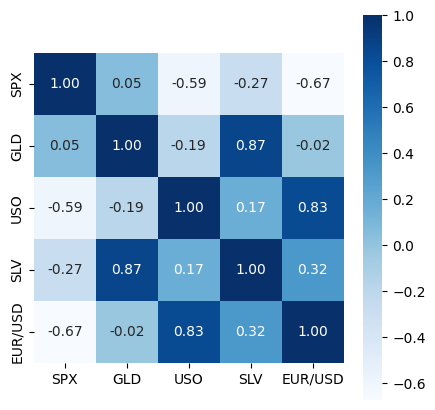

In [25]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,annot=True,fmt='.2f',cmap='Blues')

In [9]:
x=dataset.drop(['Date','GLD'],axis=1)
y=dataset['GLD']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [11]:
model=RandomForestRegressor()


In [13]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [14]:
model_train_pred=model.predict(x_train)

In [15]:
model_acc=r2_score(model_train_pred,y_train)

In [16]:
print(model_acc)

0.9984593196090821


In [17]:
model_test_pred=model.predict(x_test)
model_acc_test=r2_score(model_test_pred,y_test)
print(model_acc_test)

0.9887364093970866


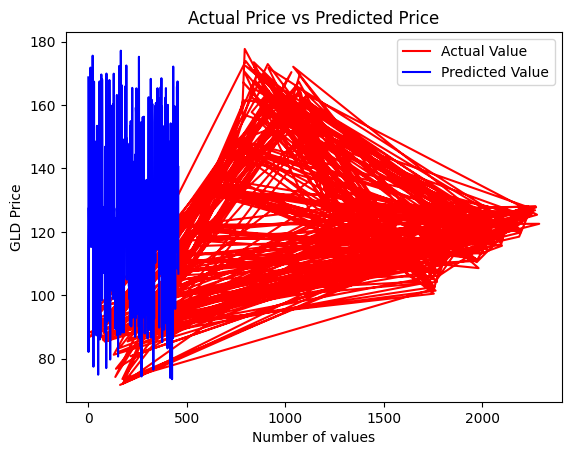

In [26]:
plt.plot(y_test,color='red',label='Actual Value')
plt.plot(model_test_pred,color='blue',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [27]:
input=(1447.160034,78.370003,15.285,1.474491)
input_arr=np.asarray(input)
input_reshape=input_arr.reshape(1,-1)
feature_names = x_train.columns
input_df = pd.DataFrame(input_reshape, columns=feature_names)
pred=model.predict(input_df)
print("Gold price Prediction:",pred)

Gold price Prediction: [85.4270997]
